# Cifar-10

In [ ]:
# Loading Libraries
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# CIFAR dataset
train_dataset = torchvision.datasets.CIFAR10(root='/data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='/data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


Files already downloaded and verified


In [ ]:
num_epochs = 5
num_classes = 10
learning_rate = 0.005

Model Architecture

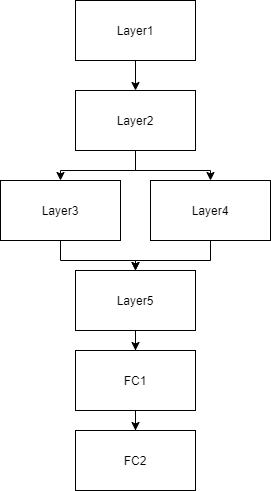

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU())
            
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU())
            
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 32, kernel_size=1, padding=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc1 = nn.Linear(8*8*32, 512)
        self.fc2 = nn.Linear(512, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out1 = self.layer3(out)
        out2 = self.layer4(out)
        out=torch.cat((out1, out2), 1)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [ ]:
model = ConvNet(num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
Loss=[]
total_step = len(train_loader)
for epoch in range(num_epochs):
    l=[]
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        l.append(loss.item())
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    Loss.append(sum(l)/len(l))


Epoch [1/5], Step [100/782], Loss: 2.0363
Epoch [1/5], Step [200/782], Loss: 1.8304
Epoch [1/5], Step [300/782], Loss: 1.8940
Epoch [1/5], Step [400/782], Loss: 1.5159
Epoch [1/5], Step [500/782], Loss: 1.3310
Epoch [1/5], Step [600/782], Loss: 1.5055
Epoch [1/5], Step [700/782], Loss: 1.4630
Epoch [2/5], Step [100/782], Loss: 1.4416
Epoch [2/5], Step [200/782], Loss: 1.0493
Epoch [2/5], Step [300/782], Loss: 1.3094
Epoch [2/5], Step [400/782], Loss: 1.2417
Epoch [2/5], Step [500/782], Loss: 1.2518
Epoch [2/5], Step [600/782], Loss: 1.0638
Epoch [2/5], Step [700/782], Loss: 1.1404
Epoch [3/5], Step [100/782], Loss: 1.3097
Epoch [3/5], Step [200/782], Loss: 1.0717
Epoch [3/5], Step [300/782], Loss: 0.8640
Epoch [3/5], Step [400/782], Loss: 0.7884
Epoch [3/5], Step [500/782], Loss: 0.7563
Epoch [3/5], Step [600/782], Loss: 0.9651
Epoch [3/5], Step [700/782], Loss: 0.9393
Epoch [4/5], Step [100/782], Loss: 0.9597
Epoch [4/5], Step [200/782], Loss: 0.7113
Epoch [4/5], Step [300/782], Loss:

In [ ]:
# Test the model
model.eval()  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 69.15 %


Text(0.5, 1.0, 'training curve')

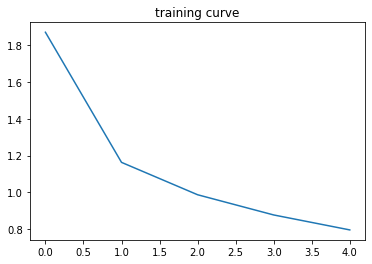

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(Loss))), Loss)
plt.title("training curve")

In [ ]:
torch.save(model.state_dict(), 'cifar-10.ckpt')